In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from sklearn import cluster

# PART 2 - DATA PREPERATION

In [2]:
## READ IN DATASET TO PANDAS DATAFRAME
column_names = ("Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Wilderness_Area_01","Wilderness_Area_02","Wilderness_Area_03","Wilderness_Area_04","Soil_Type_01","Soil_Type_02","Soil_Type_03","Soil_Type_04","Soil_Type_05","Soil_Type_06","Soil_Type_07","Soil_Type_08","Soil_Type_09","Soil_Type_10","Soil_Type_11","Soil_Type_12","Soil_Type_13","Soil_Type_14","Soil_Type_15","Soil_Type_16","Soil_Type_17","Soil_Type_18","Soil_Type_19","Soil_Type_20","Soil_Type_21","Soil_Type_22","Soil_Type_23","Soil_Type_24","Soil_Type_25","Soil_Type_26","Soil_Type_27","Soil_Type_28","Soil_Type_29","Soil_Type_30","Soil_Type_31","Soil_Type_32","Soil_Type_33","Soil_Type_34","Soil_Type_35","Soil_Type_36","Soil_Type_37","Soil_Type_38","Soil_Type_39","Soil_Type_40","Cover_Type")
soil = pd.read_table("covtype.data", sep=",", names=column_names)

In [3]:
## CHECK SHAPE OF DATA
soil.shape

(581012, 55)

In [4]:
print (soil.dtypes)
## ALL IMPORTED DATATYPES ARE NUMERICAL. THEREFORE NO WHITESPACES/BROKEN STRINGS.

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_01                    int64
Wilderness_Area_02                    int64
Wilderness_Area_03                    int64
Wilderness_Area_04                    int64
Soil_Type_01                          int64
Soil_Type_02                          int64
Soil_Type_03                          int64
Soil_Type_04                          int64
Soil_Type_05                          int64
Soil_Type_06                          int64
Soil_Type_07                          int64
Soil_Type_08                          int64
Soil_Type_09                    

In [5]:
## CONVERT WILDERNESS TYPE, SOIL TYPE AND COVER TYPE TO CATEGORICAL DATA
for pos in range(10,55):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('category')

In [6]:
## CHECK IF THERE ARE ANY MISSING VALUES
print ('MISSING VALUES : ' + str(soil.isnull().values.any()))

MISSING VALUES : False


In [7]:
## SANITY CHECKS FOR NUMERICAL COLUMNS

In [8]:
for col in soil.columns:
    if (soil[col].dtype.name == 'int64'):
        print ('Maximum value for',soil[col].name,'=',soil[col].max(axis=0), '\n')
        print ('Minimum value for',soil[col].name,'=',soil[col].min(axis=0), '\n')

Maximum value for Elevation = 3858 

Minimum value for Elevation = 1859 

Maximum value for Aspect = 360 

Minimum value for Aspect = 0 

Maximum value for Slope = 66 

Minimum value for Slope = 0 

Maximum value for Horizontal_Distance_To_Hydrology = 1397 

Minimum value for Horizontal_Distance_To_Hydrology = 0 

Maximum value for Vertical_Distance_To_Hydrology = 601 

Minimum value for Vertical_Distance_To_Hydrology = -173 

Maximum value for Horizontal_Distance_To_Roadways = 7117 

Minimum value for Horizontal_Distance_To_Roadways = 0 

Maximum value for Hillshade_9am = 254 

Minimum value for Hillshade_9am = 0 

Maximum value for Hillshade_Noon = 254 

Minimum value for Hillshade_Noon = 0 

Maximum value for Hillshade_3pm = 254 

Minimum value for Hillshade_3pm = 0 

Maximum value for Horizontal_Distance_To_Fire_Points = 7173 

Minimum value for Horizontal_Distance_To_Fire_Points = 0 



In [9]:
## SANITY CHECKS FOR CATEGORICAL COLUMNS

In [10]:
for col in soil.columns:
    if (soil[col].dtype.name == 'category'):
        print (soil[col].value_counts(), '\n')

0    320216
1    260796
Name: Wilderness_Area_01, dtype: int64 

0    551128
1     29884
Name: Wilderness_Area_02, dtype: int64 

0    327648
1    253364
Name: Wilderness_Area_03, dtype: int64 

0    544044
1     36968
Name: Wilderness_Area_04, dtype: int64 

0    577981
1      3031
Name: Soil_Type_01, dtype: int64 

0    573487
1      7525
Name: Soil_Type_02, dtype: int64 

0    576189
1      4823
Name: Soil_Type_03, dtype: int64 

0    568616
1     12396
Name: Soil_Type_04, dtype: int64 

0    579415
1      1597
Name: Soil_Type_05, dtype: int64 

0    574437
1      6575
Name: Soil_Type_06, dtype: int64 

0    580907
1       105
Name: Soil_Type_07, dtype: int64 

0    580833
1       179
Name: Soil_Type_08, dtype: int64 

0    579865
1      1147
Name: Soil_Type_09, dtype: int64 

0    548378
1     32634
Name: Soil_Type_10, dtype: int64 

0    568602
1     12410
Name: Soil_Type_11, dtype: int64 

0    551041
1     29971
Name: Soil_Type_12, dtype: int64 

0    563581
1     17431
Name: So

In [11]:
## CREATE AN ADDITIONAL COLUMN FOR WILDERNESS_TYPE.

for pos in range(10,14):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('int64')

soil['Wilderness_Type'] = soil['Wilderness_Area_01'] + soil['Wilderness_Area_02'] + soil['Wilderness_Area_03'] + soil['Wilderness_Area_04']

In [12]:
## SANITY CHECK TO SEE IF THERE ARE ANY ROWS OF DATA WITH MULTIPLE WILDERNESS TYPES (INDICATING POSSIBLE DUPLICATE RECORDS)

dup_rec = False
for i in range(soil['Wilderness_Type'].count()):
    if soil.at[i, 'Wilderness_Type'] != 1:
        dup_rec = True
        print ('Multiple Wilderness Areas detected in same row. Invalid record.')
        break

if dup_rec == False:
    print('No duplicate records found')    

No duplicate records found


In [13]:
## AGGREGATE ALL WILDERNESS_AREA DATA INTO NEWLY CREATE WILDERNESS_TYPE COLUMN

for i in range(soil['Wilderness_Type'].count()):
    if soil.at[i, 'Wilderness_Area_01'] == 1:
        soil.at[i, 'Wilderness_Type'] = 1
    elif soil.at[i, 'Wilderness_Area_02'] == 1:
        soil.at[i, 'Wilderness_Type'] = 2
    elif soil.at[i, 'Wilderness_Area_03'] == 1:
        soil.at[i, 'Wilderness_Type'] = 3
    else: 
        soil.at[i, 'Wilderness_Type'] = 4


In [14]:
## CREATE A NEW AGGREGATE COLUMN FOR GEOGRAPHICAL_ZONES. RECLASSIFY SOIL TYPE DATA INTO CORRESPONDING GEOGRAPHICAL ZONES.
## REFER TO "PART II. Data retrieving and preparation" IN THE REPORT FOR A DETAILED EXPLANATION.

for pos in range(14,54):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('int64')

soil['Geo_Zone'] = 7

type_5 = [20,21]
type_2 = [22,35,36]
type_1 = [27,28,29,30,32,33,34,35,36]

for i in range(soil['Geo_Zone'].count()):
    for j in type_5:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 5
    for j in type_2:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 2  
    for j in type_1:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 1
            
print (soil['Geo_Zone'].value_counts())

7    467469
1    112112
2      1147
5       284
Name: Geo_Zone, dtype: int64


# PART 2 - DATA EXPLORATION 

### A - EXPLORE EACH COLUMN

#### USING APPROPRIATE DESCRIPTIVE STATISTICS

In [15]:
# DESCRIPTIVE STATISTICS FOR NUMERICAL VALUES
soil.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Wilderness_Type,Geo_Zone
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.114462,5.831392
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.061295,2.373232
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,7.000000


In [16]:
# 'DESCRIPTIVE STATISTICS' NOT POSSIBLE FOR CATEGORICAL THEREFORE AN EXPLORATION OF PROPORTIONALITY EXPLORED

In [17]:
for col in soil.columns:
    if (soil[col].dtype.name == 'category'):
        print (soil[col].value_counts(normalize=True), '\n')

2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: Cover_Type, dtype: float64 



### TASK 2 SECTION A - EXPLORE PAIRS OF ATTRIBUTES#### PLOT EACH COLUMN IN INDIVIDUAL GRAPHS

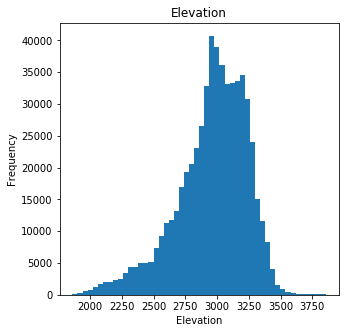

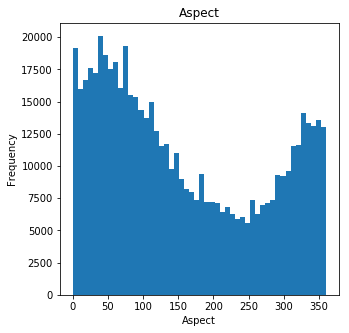

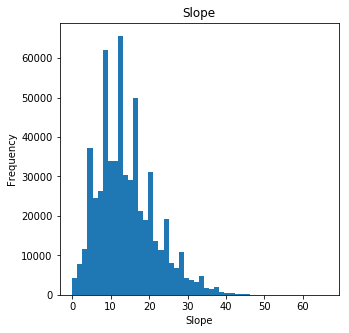

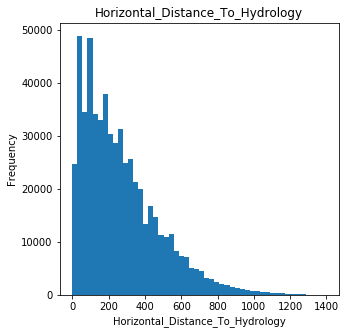

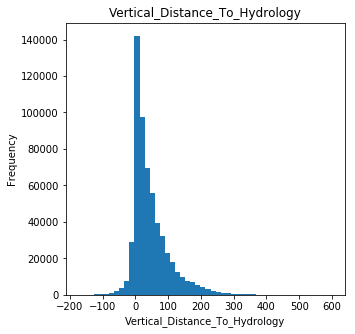

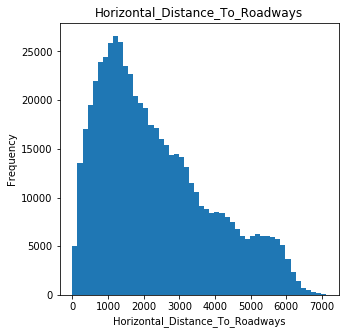

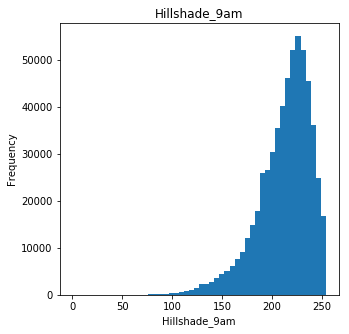

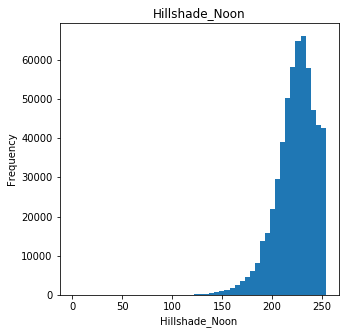

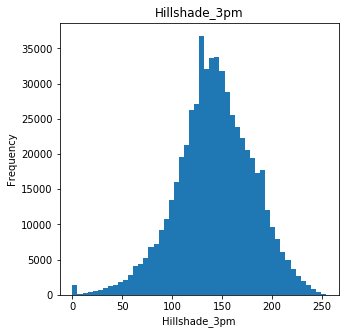

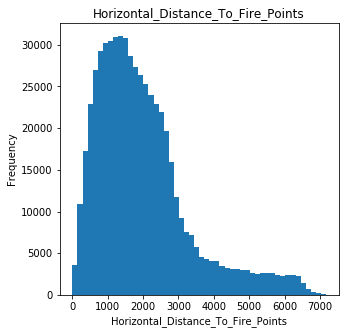

In [18]:
## HISTOGRAMS FOR NUMERICAL DATA EXPLORATION

for i, col in enumerate(soil.columns):
    if i == 10:
        break
    if (soil[col].dtype.name == 'int64'):
        plt.figure(figsize=(5, 5))
        soil[col].plot(kind='hist', bins=50)
        plt.title(col)
        plt.xlabel(col)
        axes = plt.gca()
        filename = str(soil[col].name)+"_distribution"
        plt.savefig(filename)
        plt.show()

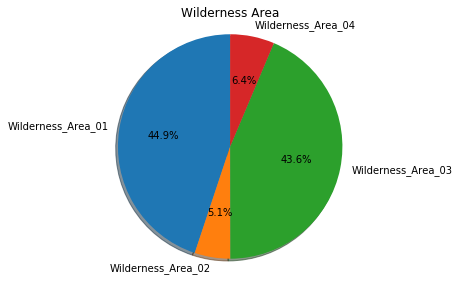

In [19]:
# TEMPORARILY CONVERT WILDERNESS AREA TO NUMERIC TO CREATE PIE CHART

soil_copy = soil.copy(deep=True)

columns = []
values = []

for pos in range(10,14):
    soil_copy[soil_copy.columns[pos]] = soil_copy[soil_copy.columns[pos]].astype('int64')
    columns.append(soil_copy.columns[pos])
    values.append(soil_copy[soil_copy.columns[pos]].sum())
    
plt.pie(values, autopct='%1.1f%%',shadow=True, labels=columns, startangle=90)
plt.axis('equal')
plt.title('Wilderness Area')
plt.tight_layout()
plt.show()

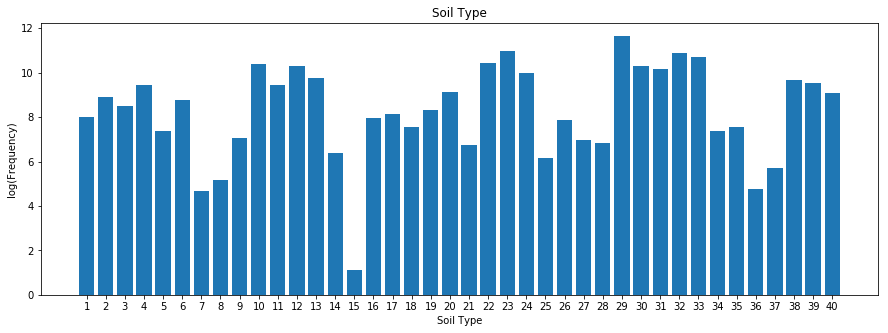

In [20]:
# TEMPORARILY CONVERT SOIL TYPE TO NUMERIC TO CREATE BAR CHART

soil_copy = soil.copy(deep=True)

columns = []
values = []

i = 1 

for pos in range(14,54):
    soil_copy[soil_copy.columns[pos]] = soil_copy[soil_copy.columns[pos]].astype('int64')
    columns.append(i)
    values.append(np.log(soil_copy[soil_copy.columns[pos]].sum()))
    i+=1
    
plt.bar(columns, values)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title("Soil Type")
plt.xlabel('Soil Type')
plt.ylabel('log(Frequency)')
plt.xticks(columns)
plt.show()

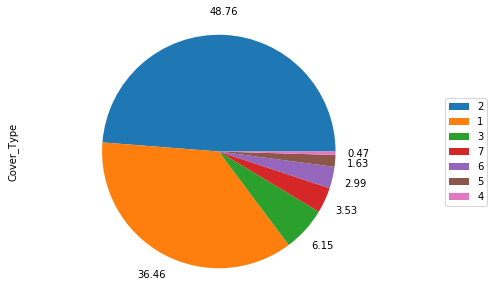

In [21]:
# PIE CHART OF COVER TYPE

soil['Cover_Type'].value_counts().plot(kind='pie',labels=None, autopct='%.2f', pctdistance=1.2)
plt.legend(labels = soil['Cover_Type'].value_counts().index, loc="right", bbox_to_anchor=(1.2, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()

### TASK 2 SECTION B - EXPLORE PAIRS OF ATTRIBUTES

In [22]:
## CREATE A SECOND DATAFRAME CONSISTING OF ONLY THE COLUMNS REQUIRED FOR CLUSTERING
## THE SECOND DATAFRAME WAS MADE UP OF ONLY INSTANCES OF WILDERNESS TYPE 1

soil_features_selected = soil[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Cover_Type','Wilderness_Type','Geo_Zone']]
soil_set_wild1_mask = soil_features_selected['Wilderness_Type'] == 1
soil_set_wild1 = soil_features_selected.loc[soil_set_wild1_mask]
soil_set_wild1.shape

(260796, 12)

Text(0.5,1,'Elevation vs Slope')

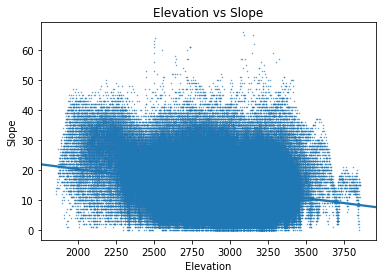

In [23]:
# Regression plot of Elevation vs Slope
sns.regplot(x="Elevation", y="Slope", data=soil, marker='o', scatter_kws={'s':0.2}).set_title('Elevation vs Slope')

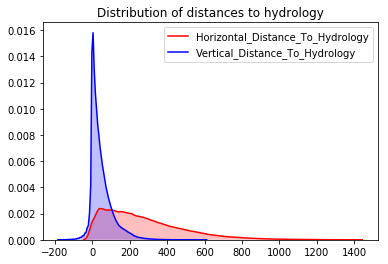

In [24]:
# Distribution of distances to hydrology

p1=sns.kdeplot(soil['Horizontal_Distance_To_Hydrology'], shade=True, color="r").set_title('Distribution of distances to hydrology')
p1=sns.kdeplot(soil['Vertical_Distance_To_Hydrology'], shade=True, color="b")

Text(0.5,1,'Aspect Ratio vs Hillshade Index at noon')

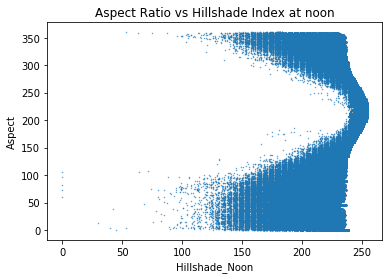

In [25]:
# Aspect Ratio vs Hillshade Index at noon

sns.regplot(x="Hillshade_Noon", y="Aspect", data=soil, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Aspect Ratio vs Hillshade Index at noon')

Text(0.5,1,'Aspect Ratio vs Hillshade Index at 3pm')

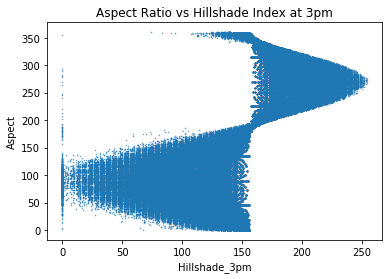

In [26]:
# Aspect Ratio vs Hillshade Index at 3pm

sns.regplot(x="Hillshade_3pm", y="Aspect", data=soil, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Aspect Ratio vs Hillshade Index at 3pm')

Text(0.5,1,'Aspect Ratio vs Hillshade Index at 3pm')

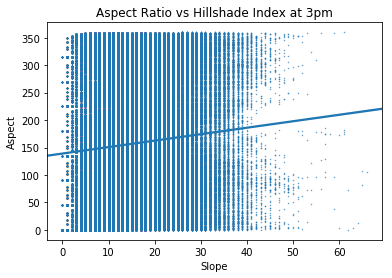

In [27]:
# Aspect Ratio vs Hillshade Index at 3pm

sns.regplot(x="Slope", y="Aspect", data=soil, marker='o', scatter_kws={'s':0.2}).set_title('Aspect Ratio vs Hillshade Index at 3pm')

Text(0.5,1,'Elevation vs Vertical Distance To Land Water Feature (Hyrdology)')

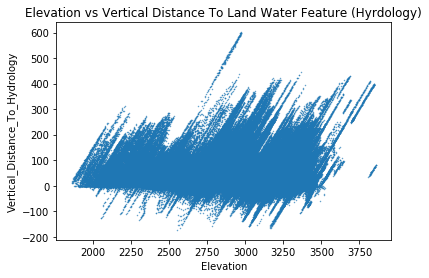

In [28]:
# Vertical Distance to Hyrdology vs Elevation

sns.regplot(x="Elevation", y="Vertical_Distance_To_Hydrology", data=soil, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Elevation vs Vertical Distance To Land Water Feature (Hyrdology)')

Text(0.5,1,'Elevation vs Horizontal Distance To Roadways')

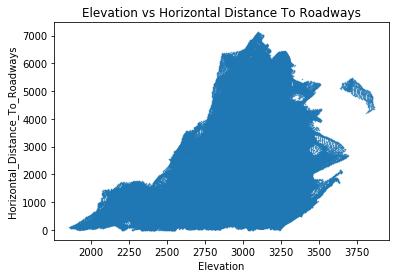

In [29]:
# Vertical Distance to Hyrdology vs Elevation

sns.regplot(x="Elevation", y="Horizontal_Distance_To_Roadways", data=soil, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Elevation vs Horizontal Distance To Roadways')

Text(0.5,1,'Elevation vs Horizontal Distance To Roadways')

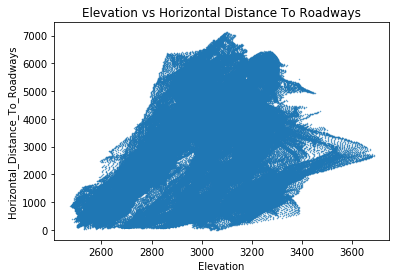

In [30]:
# Regression plot of Elevation vs Horizontal Distance to Roadways

sns.regplot(x="Elevation", y="Horizontal_Distance_To_Roadways", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Elevation vs Horizontal Distance To Roadways')

In [31]:
# Convert categorical columns to int64 in preparation for further exploration

for col in soil_set_wild1.columns:
    soil_set_wild1[col] = soil_set_wild1[col].astype('int64')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## GRAPHS FOR FURTHER EXPLORATION THROUGH CLUSTERING

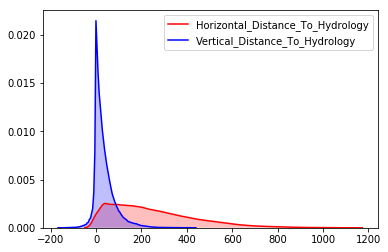

In [32]:
# Distribution of Horizontal and Vertical Distance to Hydrology

p1=sns.kdeplot(soil_set_wild1['Horizontal_Distance_To_Hydrology'], shade=True, color="r")
p1=sns.kdeplot(soil_set_wild1['Vertical_Distance_To_Hydrology'], shade=True, color="b")

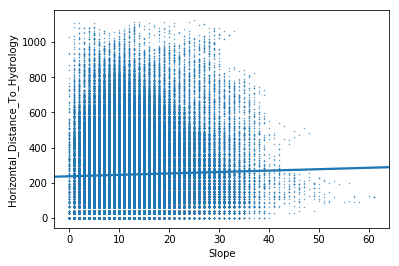

In [33]:
# Regression plot comparing slope and Horizontal Distance to Hydrology 

sns.regplot(x="Slope", y="Horizontal_Distance_To_Hydrology", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})

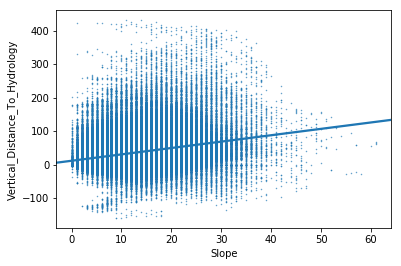

In [34]:
# Regression plot comparing slope and Vertical Distance to Hydrology 

sns.regplot(x="Slope", y="Vertical_Distance_To_Hydrology", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})

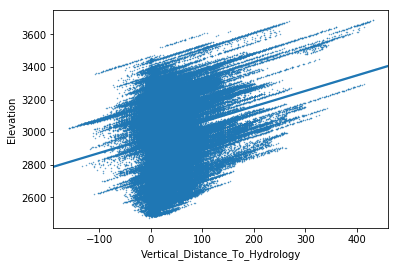

In [35]:
# Regression plot comparing Vertical Distance to Hydrology and Elevation

sns.regplot(x="Vertical_Distance_To_Hydrology", y="Elevation", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})

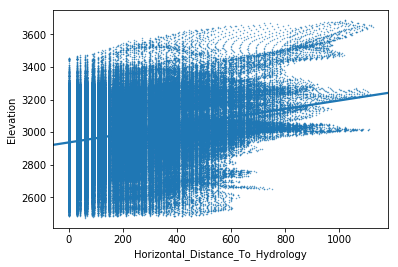

In [36]:
# Regression plot comparing Vertical Distance to Hydrology and Elevation

sns.regplot(x="Horizontal_Distance_To_Hydrology", y="Elevation", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})

In [37]:
# Create a new dataset where Geo Zone, Wilderness Type and Cover Type are categorical. Categorical data is easier to scatter plot. 

soil_set_wild1_modified = soil_set_wild1.copy(deep=True)
soil_set_wild1_modified[soil_set_wild1_modified.columns[11]] = soil_set_wild1_modified[soil_set_wild1_modified.columns[11]].astype('category')
soil_set_wild1_modified[soil_set_wild1_modified.columns[10]] = soil_set_wild1_modified[soil_set_wild1_modified.columns[10]].astype('category')
soil_set_wild1_modified[soil_set_wild1_modified.columns[9]] = soil_set_wild1_modified[soil_set_wild1_modified.columns[9]].astype('category')

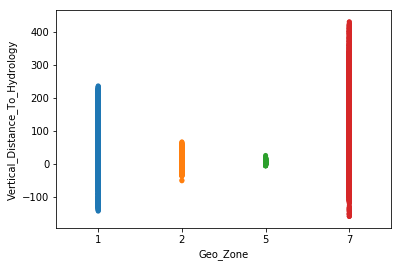

In [38]:
# Scatter plot comparing Geo Zone and Vertical Distance to Hydrology

sns.stripplot(x="Geo_Zone", y="Vertical_Distance_To_Hydrology", data=soil_set_wild1_modified)

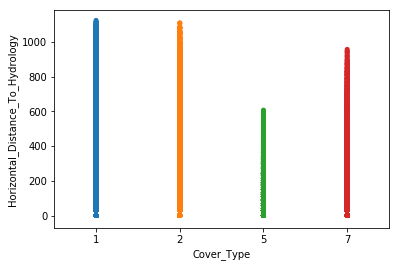

In [39]:
# Scatter plot comparing Geo Zone and Vertical Distance to Hydrology

sns.stripplot(x="Cover_Type", y="Horizontal_Distance_To_Hydrology", data=soil_set_wild1_modified)

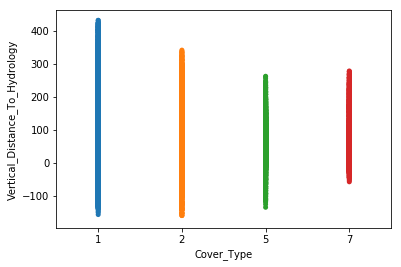

In [40]:
# Scatter plot comparing Cover Type and Vertical Distance to Hydrology

sns.stripplot(x="Cover_Type", y="Vertical_Distance_To_Hydrology", data=soil_set_wild1_modified)

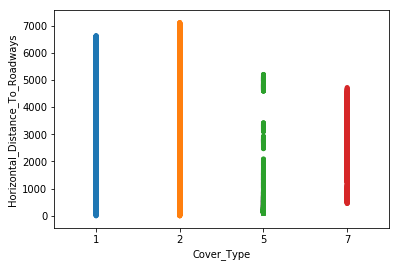

In [41]:
# Scatter plot comparing Cover Type and Horizontal Distance to Roadways

sns.stripplot(x="Cover_Type", y="Horizontal_Distance_To_Roadways", data=soil_set_wild1_modified)

In [42]:
soil_set_wild1_modified.dtypes

Elevation                              int64
Aspect                                 int64
Slope                                  int64
Horizontal_Distance_To_Hydrology       int64
Vertical_Distance_To_Hydrology         int64
Horizontal_Distance_To_Roadways        int64
Hillshade_9am                          int64
Hillshade_Noon                         int64
Hillshade_3pm                          int64
Cover_Type                          category
Wilderness_Type                     category
Geo_Zone                            category
dtype: object

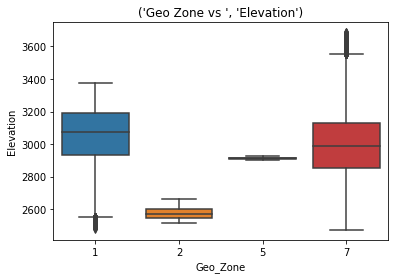

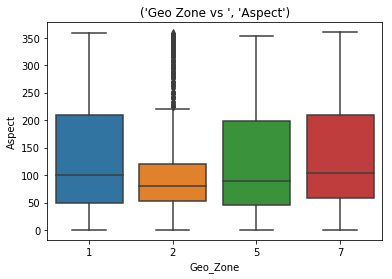

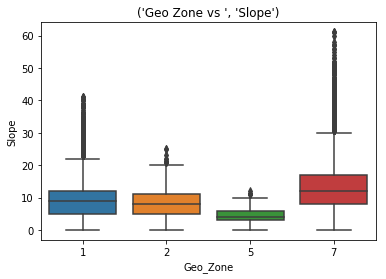

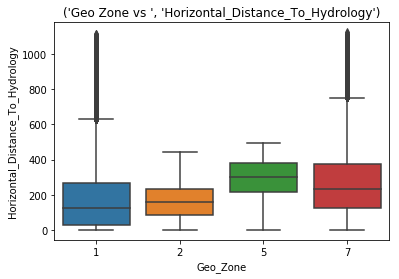

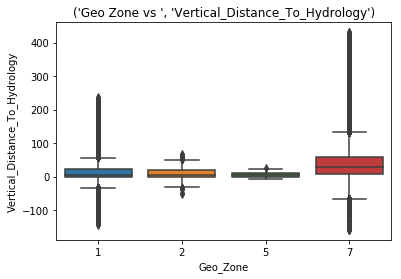

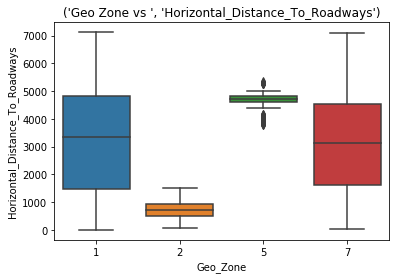

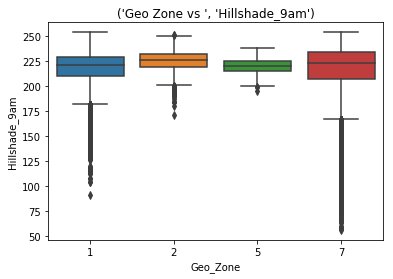

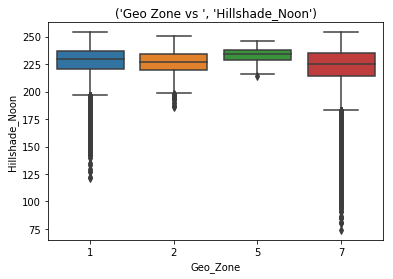

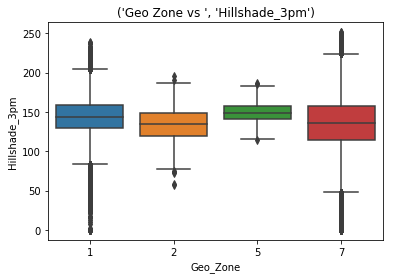

In [43]:
# Comparing Geo Zone vs Numerical Data

for i, col in enumerate(soil_set_wild1_modified.columns):
    if (soil_set_wild1_modified[col].dtype.name == 'int64'):
        plt.figure(i)
        titles = 'Geo Zone vs ', col
        sns.boxplot(x=soil_set_wild1_modified["Geo_Zone"], y=soil_set_wild1_modified[col]).set_title(titles)

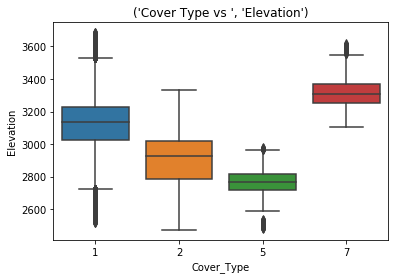

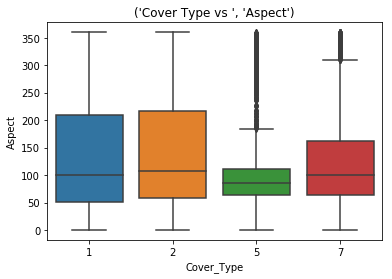

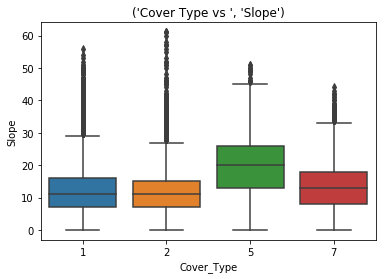

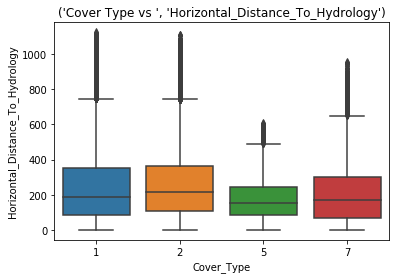

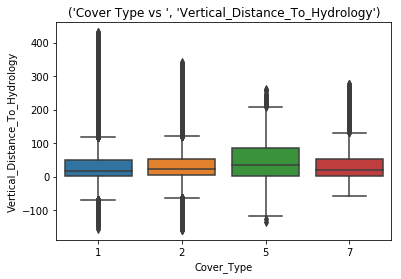

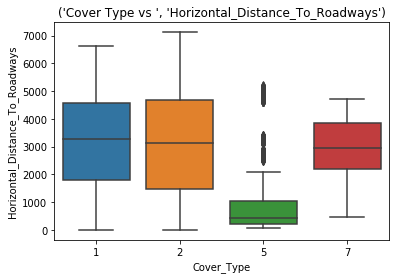

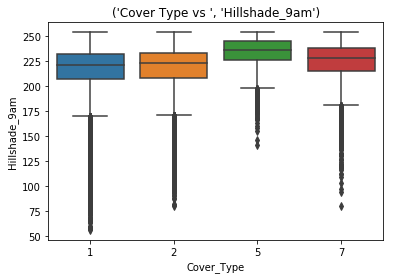

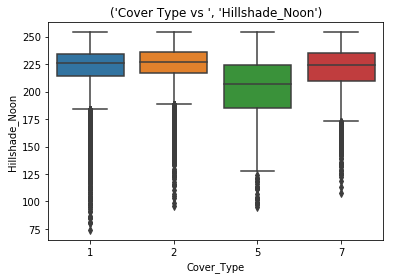

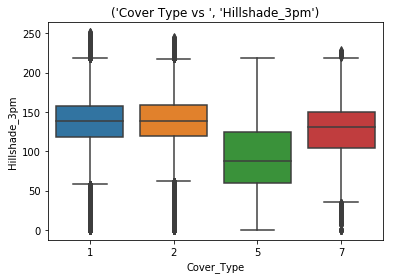

In [44]:
# Comparing Cover Type vs Numerical Data

for i, col in enumerate(soil_set_wild1_modified.columns):
    if (soil_set_wild1_modified[col].dtype.name == 'int64'):
        plt.figure(i)
        titles = 'Cover Type vs ', col
        sns.boxplot(x=soil_set_wild1_modified["Cover_Type"], y=soil_set_wild1_modified[col]).set_title(titles)

In [ ]:
# Prepare data for k means clustering by copying data to a new frame and calculating zscores for the columns

df_tr = soil_set_wild1.copy(deep=True)
clmns = np.array(soil_set_wild1.columns)
df_tr_std = stats.zscore(df_tr[clmns])

In [45]:
## Create Scatter Matrix

#from pandas.plotting import scatter_matrix
#scatter_matrix(soil,alpha=0.2,figsize=(80, 80),diagonal='hist')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


## Horizontal Distance to Hydrology vs Vertical Distance to Hydrology

In [109]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import datetime

In [110]:
#soil[soil.columns[10]] = soil[soil.columns[10]].astype('int64')

dataset_subset = soil[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Cover_Type","Wilderness_Type","Geo_Zone"]]

model_prep = dataset_subset.copy(deep=True) 
model_prep.drop(model_prep.index[10000:], inplace=True)

model_prep[model_prep.columns[10]] = model_prep[model_prep.columns[10]].astype('int64')

In [111]:
##############################################################################
# INITIALIZING MODEL PARAMETERS FOR TESTING
# VARIABLES EXPLORED: HORIZONTAL HYRDO to VERTICAL HYRDO
##############################################################################

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 3
variable_2 = 4

# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_df = model_prep.iloc[:,[variable_1,variable_2]] 

# STANDARDISERS THIS SUBSET THAT WE ARE ABOUT TO MODEL AND RETURNS TO DATAFRAME FORMAT 
# (FOR EASE OF CALLING LATER)
scaled_features = StandardScaler().fit_transform(model_df)
model = pd.DataFrame(scaled_features, index=model_df.index, columns=model_df.columns)

In [112]:
##########################
## EXPORT TO JPEG FUNCTION
##########################
def export_to_jpeg(no_clusters,random_state):
    now = datetime.datetime.now()
    filename = "k_"+str(no_clusters)+"_random_state_"+str(random_state)+"_plots_at_"+str(now.hour)+"_"+str(now.minute)+"_"+str(now.day)+".jpeg"
    plt.savefig(filename)
    
def export_to_jpeg_boxplot(no_clusters,random_state):
    now = datetime.datetime.now()
    filename = "boxplot_"+str(model.columns[0])+"_groupedByClusters_"+str(now.hour)+"_"+str(now.minute)+"_"+str(now.day)+".jpeg"
    plt.savefig(filename)
    

########################
##VISUALISATION FUNCTION
########################
def plot_clusters_graph(variable_1,variable_2):
    title = "KMEANS scatter plot for "+str(model.columns[0])+" vs "+str(model.columns[1])+" using k = "+ str(no_clusters)+" and a random seed of "+ str(random_state)
    plt.figure(figsize=(15, 15))
    plt.scatter(model.iloc[:,0],model.iloc[:,1], c=labels, alpha = 0.8, s= 250.0, lw= 0)
    plt.title(title)
    export_to_jpeg(no_clusters,random_state)  ## Saving an export of the graph
    plt.show() 
    #DO SOMETHING ABOUT OUTLIERS...CHANGE COLOURS SO I HAVE MORE CONTROL 
    

In [113]:
#Elbow curve

current_clmns = []

current_clmns.append(model_prep.columns[variable_1])
current_clmns.append(model_prep.columns[variable_2])

In [114]:
print (current_clmns)

['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']


In [115]:
df_tr_std = stats.zscore(model_prep[current_clmns])

cluster_range  = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( df_tr_std )
  cluster_errors.append( clusters.inertia_ )

In [116]:
#Print Elbow curve table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,cluster_errors,num_clusters
0,20000.000000,1
1,9285.399144,2
2,6356.067396,3
3,4947.785421,4
4,3800.394174,5
5,3142.150652,6
6,2658.547773,7
7,2370.058100,8
8,2097.770870,9
9,1896.366522,10


Text(0,0.5,'SSE')

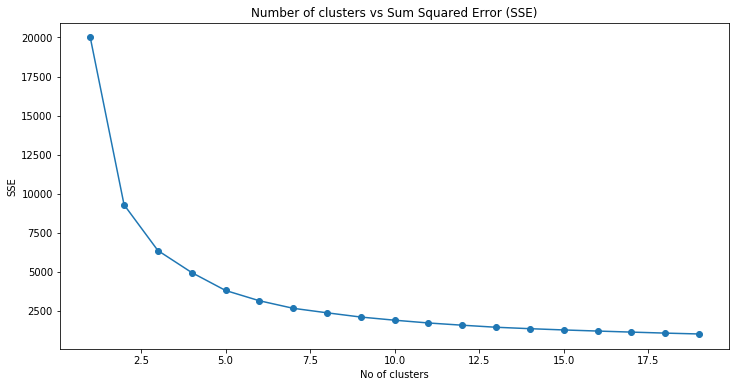

In [117]:
#Print Elbow curve table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title("Number of clusters vs Sum Squared Error (SSE)")
plt.xlabel('No of clusters')
plt.ylabel('SSE')

In [118]:
#####################
##VALIDATION FUNCTION
#####################
def validate_test():

    # clustering result
    clustering_result = model[["clusters", "target", "c"]].groupby(["clusters", "target"]).agg("count") 
    print ("This is the clustering result\n")
    print(clustering_result)
    
    # confusion matrix
    confusion_matrix = (clustering_result.reset_index().pivot_table(index='clusters', columns='target', values='c', aggfunc='sum', fill_value=0))
    print ("This is the confusion matrix\n")
    print(confusion_matrix)

    # other validation techniques/ graph comparison of each column by cluster 
    model_prep['clusters'] = labels
    for col in dataset_subset.columns: 
        title = 'Box plot of '+col+' by clusters'
        plt.figure(col)
        model_prep.boxplot(column=col,by='clusters')
        plt.title(title)
        plt.suptitle("")
        plt.ylabel(col)
        

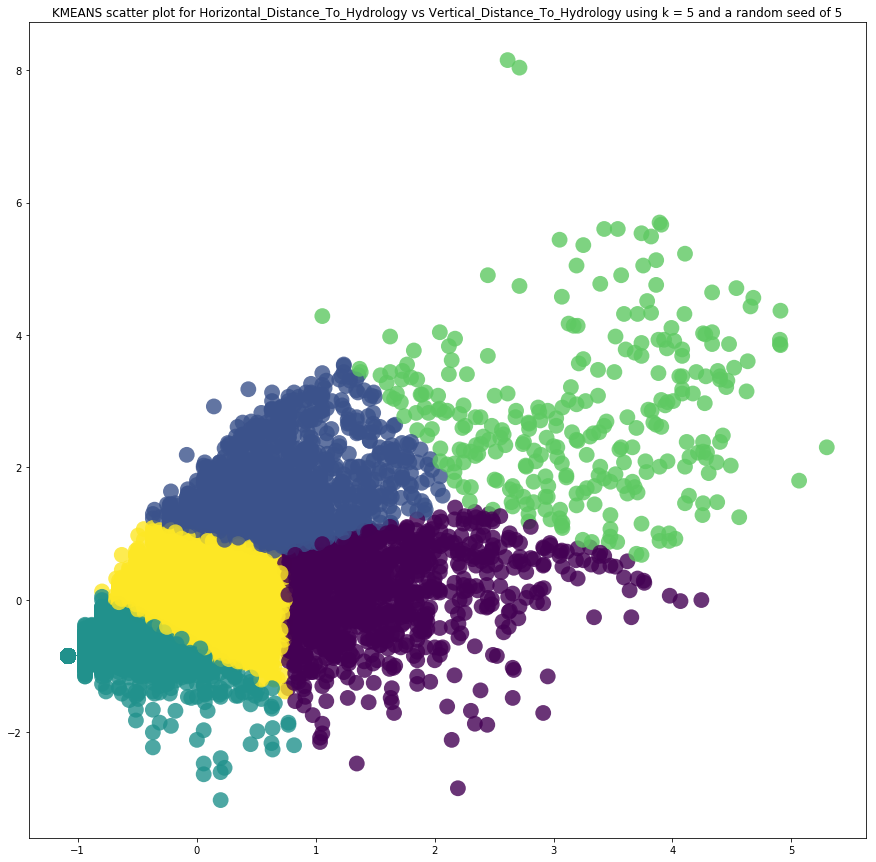

This is the clustering result

                    c
clusters target      
0        1        239
         2        281
         3         79
         4         25
         5        114
         6         53
         7        257
1        1         77
         2        118
         3        266
         4        246
         5        217
         6        180
         7        164
2        1        615
         2        510
         3        404
         4       1058
         5        702
         6        582
         7        484
3        1         51
         2         52
         3          4
         4          1
         5         22
         7        152
4        1        393
         2        501
         3        509
         4        290
         5        528
         6        534
         7        292
This is the confusion matrix

target      1    2    3     4    5    6    7
clusters                                    
0         239  281   79    25  114   53  257
1          7

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


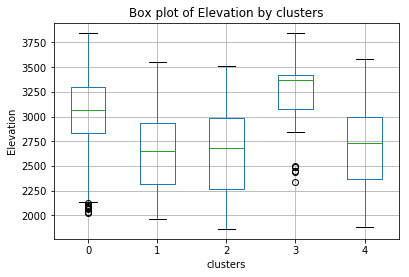

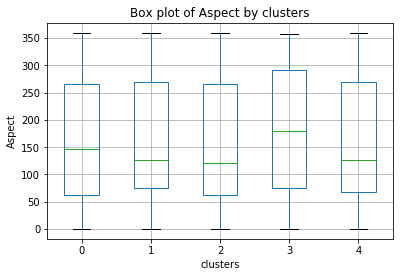

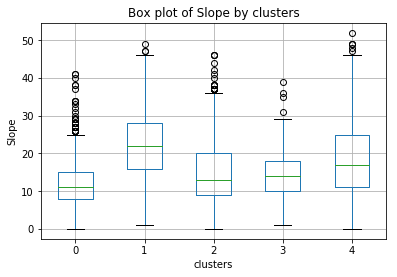

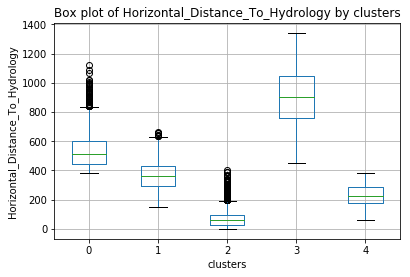

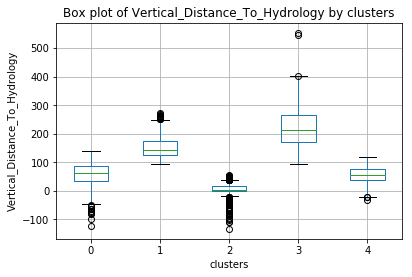

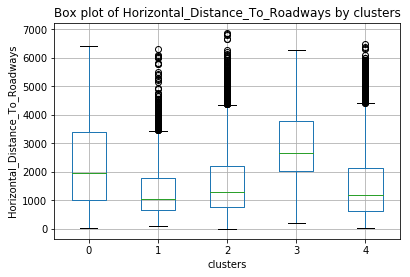

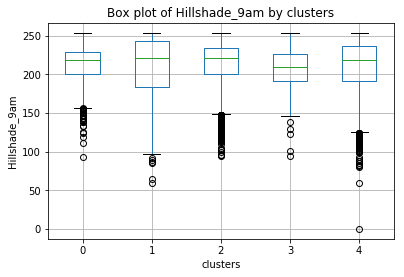

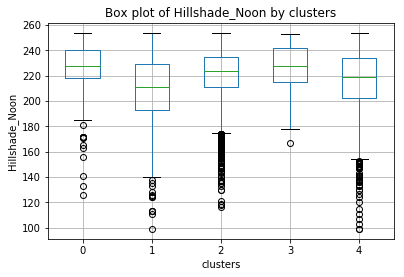

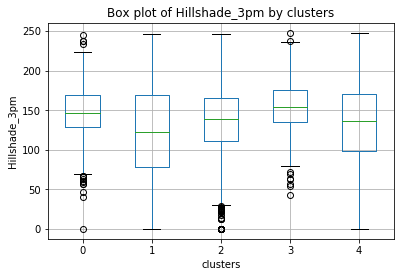

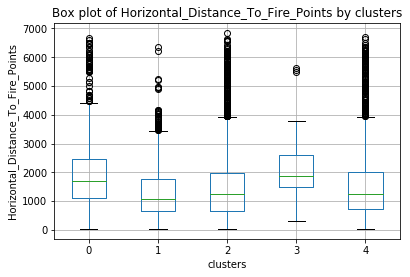

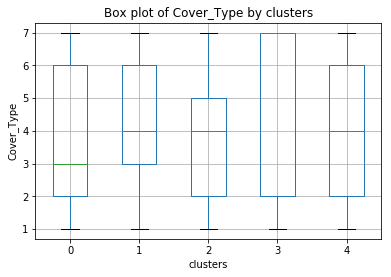

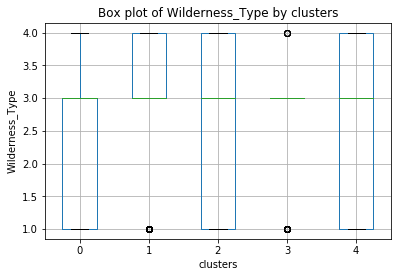

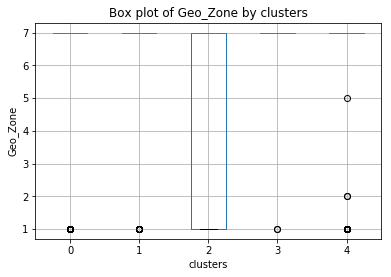

In [119]:
#######################################
# NOW RUN MODEL, VISUALISE AND VALIDATE
#######################################

### DBSCANS ARGUMENTS
no_clusters = 5
random_state = 5

########################
##MODELLING SECTION
########################
dbs = cluster.KMeans(n_clusters = no_clusters, random_state=random_state) # Run the model
dbs_fit = dbs.fit(model)
labels = dbs_fit.labels_
model['clusters'] = labels
model['c'] = "count"
model['target'] = model_prep['Cover_Type']

#########################
## VISUALISE AND VALIDATE
#########################
plot_clusters_graph(variable_1,variable_2) # calls function to visualise clusters
validate_test() # calls function to validate model